In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
import os

In [0]:
base_dir = '/content/drive/My Drive/Neural/Leaf'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training apple_scab pictures
train_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')

# Directory with our training apple_healthy pictures
train_healthy_dir = os.path.join(train_dir, 'Apple___healthy')

# Directory with our validation apple_scab pictures
validation_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')

# Directory with our validation apple_healthy pictures
validation_healthy_dir = os.path.join(validation_dir, 'Apple___healthy')

In [0]:
train_scab_fnames = os.listdir(train_scab_dir)
train_healthy_fnames = os.listdir(train_healthy_dir)

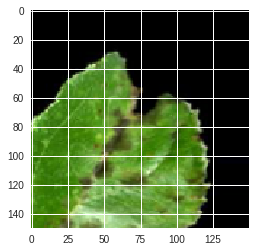

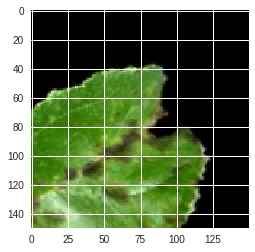

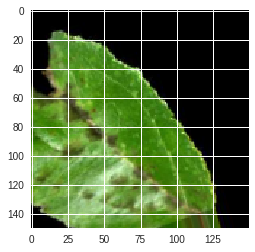

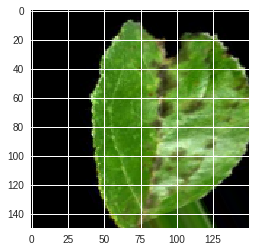

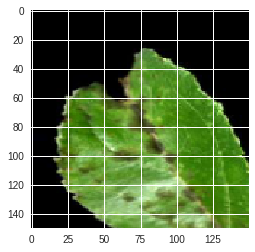

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_scab_dir, train_scab_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [8]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 1455 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=291,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=73,
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
73/73 [==============================] - 2s 25ms/step - loss: 0.1856 - acc: 0.9260
 - 18s - loss: 0.4294 - acc: 0.7959 - val_loss: 0.1856 - val_acc: 0.9260
Epoch 2/30
73/73 [==============================] - 2s 24ms/step - loss: 0.2036 - acc: 0.9151
 - 17s - loss: 0.3267 - acc: 0.8674 - val_loss: 0.2036 - val_acc: 0.9151
Epoch 3/30
73/73 [==============================] - 2s 24ms/step - loss: 0.1521 - acc: 0.9425
 - 17s - loss: 0.3403 - acc: 0.8763 - val_loss: 0.1521 - val_acc: 0.9425
Epoch 4/30
73/73 [==============================] - 2s 25ms/step - loss: 0.1888 - acc: 0.9452
 - 17s - loss: 0.3161 - acc: 0.8763 - val_loss: 0.1888 - val_acc: 0.9452
Epoch 5/30
73/73 [==============================] - 2s 25ms/step - loss: 0.2980 - acc: 0.9014
 - 17s - loss: 0.3202 - acc: 0.8818 - val_loss: 0.2980 - val_acc: 0.9014
Epoch 6/30
73/73 [==============================] - 2s 25ms/step - loss: 0.2536 - acc: 0.8822
 - 17s - loss: 0.3169 -

Text(0.5, 1.0, 'Training and validation loss')

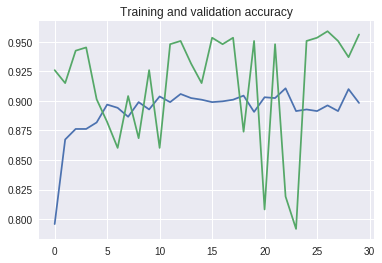

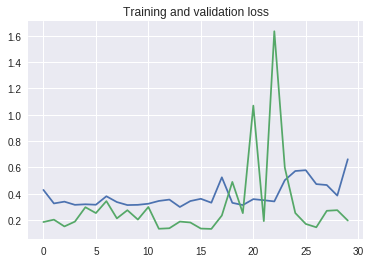

In [11]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')